In [ ]:
!pip install tensorflow tensorflow-cpu opencv-python matplotlib

In [1]:
import tensorflow as tf
import os

### 1. Clean Dataset

In [3]:
import cv2
import imghdr

In [4]:
data_dir = r'data' 

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 441 files belonging to 3 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

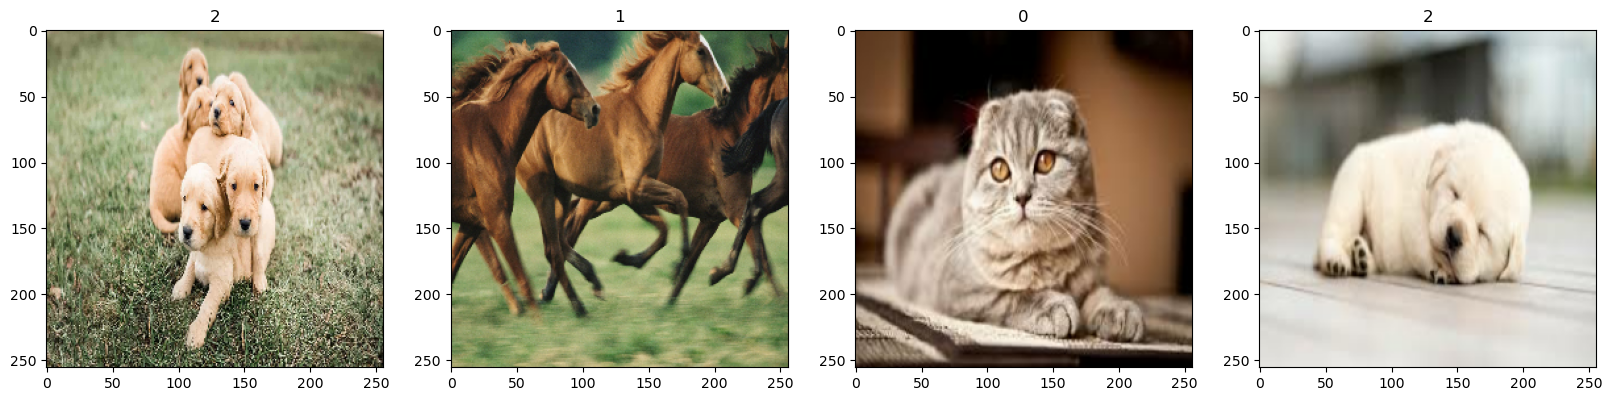

In [19]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [20]:
# 2 = Puppies
# 1 = Horses
# 0 = Cats

## 4. Scale Data

In [24]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

In [28]:
# In each batch we have a lot of images, or the number we stablish
# Each image is made batch we have 2 objects, the image list and the labels list
# The labels are represented as integers
# The first image in the list goes with the first label in the list, and so on

for element in data.take(1):  # Take the first element
    print(element[1][0])

tf.Tensor(2, shape=(), dtype=int32)


In [30]:
for element in data.take(1):  # Take the first element
    print(element[0][0])

tf.Tensor(
[[[0.99215686 0.9882353  0.98039216]
  [0.99215686 0.9882353  0.98039216]
  [0.99215686 0.9882353  0.98039216]
  ...
  [0.9882353  0.99215686 0.972549  ]
  [0.99607843 0.99215686 0.9764706 ]
  [0.99607843 0.99215686 0.9764706 ]]

 [[0.99215686 0.9882353  0.9794118 ]
  [0.99215686 0.9882353  0.9794118 ]
  [0.99215686 0.9882353  0.9794118 ]
  ...
  [0.9882353  0.99215686 0.972549  ]
  [0.99607843 0.99215686 0.9764706 ]
  [0.99607843 0.99215686 0.9764706 ]]

 [[0.9916667  0.9877451  0.97205883]
  [0.99215686 0.9882353  0.972549  ]
  [0.9882353  0.9843137  0.96862745]
  ...
  [0.99215686 0.9882353  0.972549  ]
  [0.99215686 0.9882353  0.972549  ]
  [1.         0.9843137  0.972549  ]]

 ...

 [[0.99215686 0.9764706  0.9647059 ]
  [0.99215686 0.9764706  0.9647059 ]
  [0.9882353  0.972549   0.9607843 ]
  ...
  [0.99215686 0.972549   0.9607843 ]
  [0.99215686 0.972549   0.9607843 ]
  [0.99215686 0.972549   0.9607843 ]]

 [[0.9882353  0.972549   0.9607843 ]
  [0.9882353  0.972549   0

## 5. Split Data

In [33]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

print(len(data), train_size, val_size, test_size)

14 9 3 2


In [35]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [37]:
for element in train.take(1):  # Take the first element
    print(element[1])
for element in val.take(1):  # Take the first element
    print(element[1])
for element in test.take(1):  # Take the first element
    print(element[1])

tf.Tensor([1 0 0 2 1 2 0 0 2 1 2 2 0 0 2 1 1 2 0 1 0 2 0 0 2 0 0 2 2 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 2 0 1 2 1 0 1 0 2 1 1 2 2 1 2 1 2 2 0 2 2 0 0 2 1 0 2 1 0 2 0], shape=(32,), dtype=int32)
tf.Tensor([0 1 2 0 1 2 2 0 2 1 2 1 2 2 1 2 1 2 1 1 2 1 0 2 1 1 2 2 0 1 1 1], shape=(32,), dtype=int32)


In [39]:
for image, label in train.take(1):
    print(image.shape)  # Should print (batch_size, 256, 256, 3)
    print(label.shape)  # Should match the number of classes


(32, 256, 256, 3)
(32,)


## 6. Build Model

In [46]:
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

In [357]:
# Creating a Sequential model
model= Sequential()
# Input Layer
model.add(Conv2D(kernel_size=(3, 3), filters=32, activation='relu', input_shape=(256, 256, 3), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2, 2))  # Reduces dimensions to 128x128

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2, 2))  # Reduces dimensions to 64x64

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2, 2))  # Reduces dimensions to 32x32

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2, 2))  # Reduces dimensions to 16x16

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2, 2))  # Reduces dimensions to 8x8

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2, 2))  # Reduces dimensions to 4x4

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2, 2))  # Reduces dimensions to 2x2
          
model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(3,activation='softmax'))
    
model.compile(
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [359]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_62 (Conv2D)                   │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 8, 8, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 4, 4, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 20)                  │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 3)                   │              48 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 348,623 (1.33 MB)

 Trainable params: 348,623 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Train

In [362]:
logdir='logs'

In [364]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [366]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - acc: 0.3591 - loss: 1.1006 - val_acc: 0.3646 - val_loss: 1.0979
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - acc: 0.3785 - loss: 1.0955 - val_acc: 0.3854 - val_loss: 1.0775
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - acc: 0.3503 - loss: 1.0827 - val_acc: 0.3125 - val_loss: 1.0867
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - acc: 0.3691 - loss: 1.0897 - val_acc: 0.4792 - val_loss: 1.0836
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - acc: 0.4098 - loss: 1.0698 - val_acc: 0.4583 - val_loss: 0.9314
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - acc: 0.4420 - loss: 1.0340 - val_acc: 0.4896 - val_loss: 0.9575
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - acc: 0.4367 - loss: 1.0563 - val_acc: 0.5417 - val_loss: 0.9657
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - acc: 0.4893 - loss: 0.9909 - val_acc: 0.5521 - val_loss: 0.8789
Epoch 9/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - acc: 0.5282 - loss: 0.9308 - val_acc: 

## 8. Plot Performance

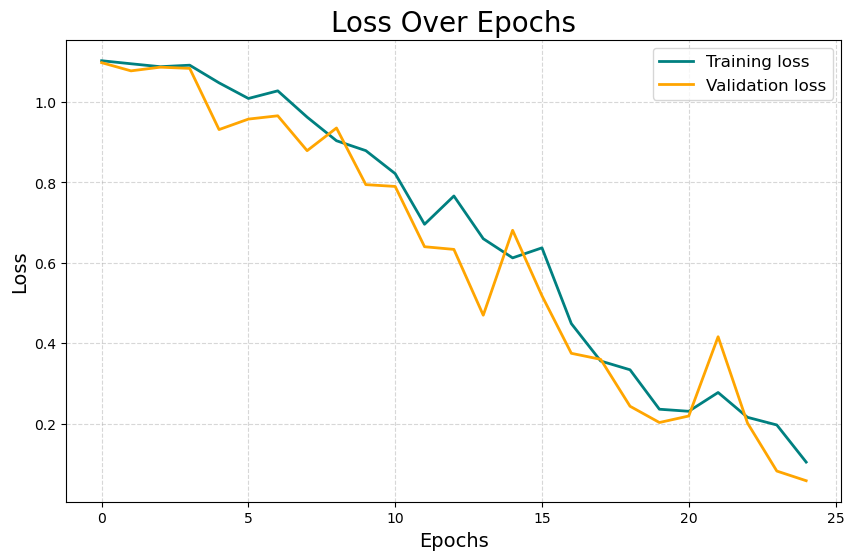

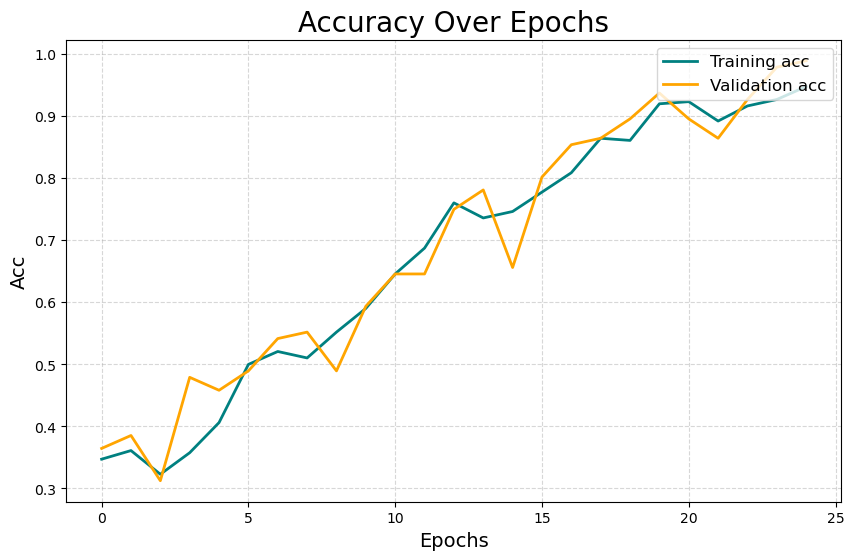

In [368]:
import matplotlib.pyplot as plt

def plot_training_history(hist, metric='loss', val_metric='val_loss', title='Model Training History'):

    fig = plt.figure(figsize=(10, 6))
    
    # Plot training and validation metrics
    plt.plot(hist.history[metric], label=f'Training {metric}', color='teal', linewidth=2)
    plt.plot(hist.history[val_metric], label=f'Validation {metric}', color='orange', linewidth=2)
    
    # Add labels, legend, and title
    plt.title(title, fontsize=20)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel(metric.capitalize(), fontsize=14)
    plt.legend(loc="upper right", fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    
    # Display the plot
    plt.show()

# Example usage
plot_training_history(hist, metric='loss', val_metric='val_loss', title='Loss Over Epochs')
plot_training_history(hist, metric='acc', val_metric='val_acc', title='Accuracy Over Epochs')


## 9. Evaluate

In [370]:
from sklearn.metrics import classification_report

# Collect all true labels and predictions
y_true_all = []
y_pred_all = []

for batch in test:
    X, y_true = batch
    y_pred = model.predict(X)
    y_pred_classes = tf.argmax(y_pred, axis=1)
    
    y_true_all.extend(y_true.numpy())
    y_pred_all.extend(y_pred_classes.numpy())

# Generate classification report
report = classification_report(y_true_all, y_pred_all, target_names=['Cats', 'Horses', 'Puppies'])
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
              precision    recall  f1-score   support

        Cats       1.00      0.95      0.97        20
      Horses       0.95      1.00      0.97        19
     Puppies       1.00      1.00      1.00        18

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



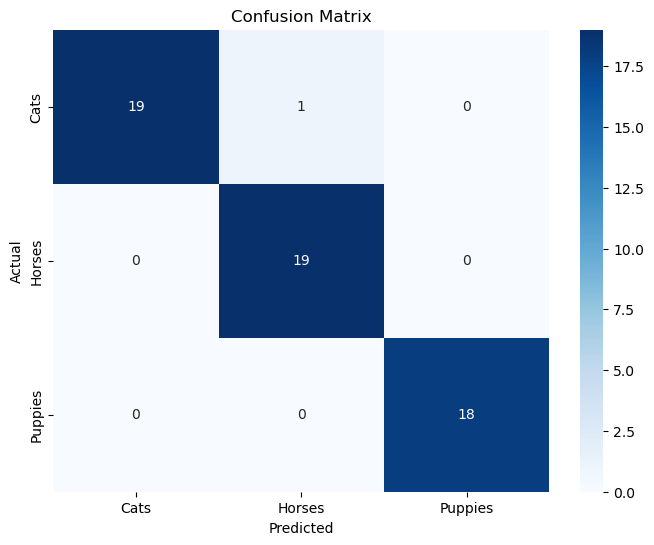

In [449]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_true_all, y_pred_all)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cats', 'Horses', 'Puppies'],
            yticklabels=['Cats', 'Horses', 'Puppies'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## 10. Test

In [373]:
import cv2

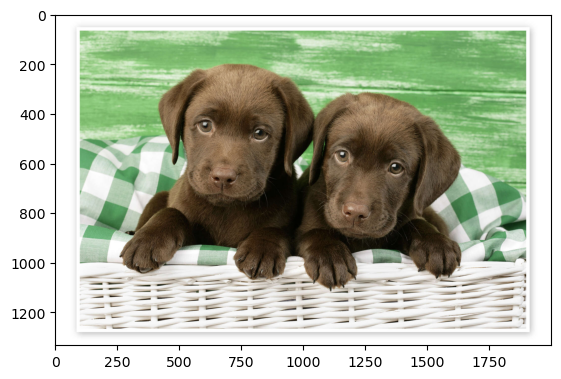

In [453]:
img = cv2.imread(r'puppies.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.show()

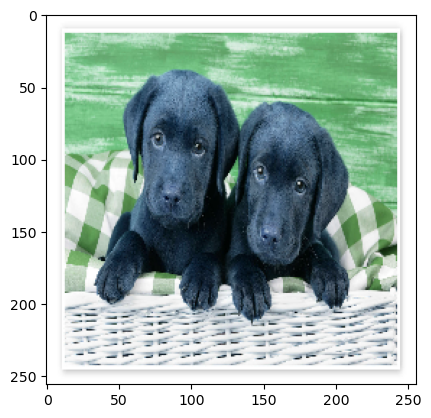

In [455]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [457]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [459]:
yhat

array([[1.1268866e-04, 3.6268005e-01, 6.3720727e-01]], dtype=float32)

In [461]:
# Define the class mapping
class_mapping = {0: 'Cat', 1: 'Horse', 2: 'Puppy'}

predicted_class = np.argmax(yhat, axis=1)[0]  # Get the index of the highest probability
print(predicted_class)

# Map the predicted class index to the class name
predicted_label = class_mapping[predicted_class]

# Display the result
print(f"Predicted Class Index: {predicted_class}")
print(f"Predicted Label: {predicted_label}")

2
Predicted Class Index: 2
Predicted Label: Puppy


## 11. Save the model

In [464]:
model.save('imageclassification.h5')